# In this notebook I will run clustering algorithms on the fruits found in the Fruityvice webservice dataset. I want to see if the clusters correspond in some way to the family, order, or genus.

## The values for each nutrition category in in 100g of the fruit. Keep in mind that the values provided in the dataset are not factual. This exercise is just for exploration purposes.

## Algorithms to try:
1. KMeans
2. DBSCAN

In [1]:
# Modules required for this notebook

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans, DBSCAN

In [2]:
fruit_df = pd.read_csv("../input/fruityvice-fuits-dataset/Fruityvice_fruits.csv")
fruit_df.drop(columns=fruit_df.columns[[0, 2]], inplace=True) # First col is an index column and the third one is the ID the site used
fruit_df

,name,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00
1,Strawberry,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80
2,Banana,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
3,Tomato,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90
4,Pear,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40
5,Durian,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50
6,Blackberry,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
7,Lingonberry,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75
8,Kiwi,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10
9,Lychee,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80


# Which are the 10 fruits per each nutrition category with the highest value?

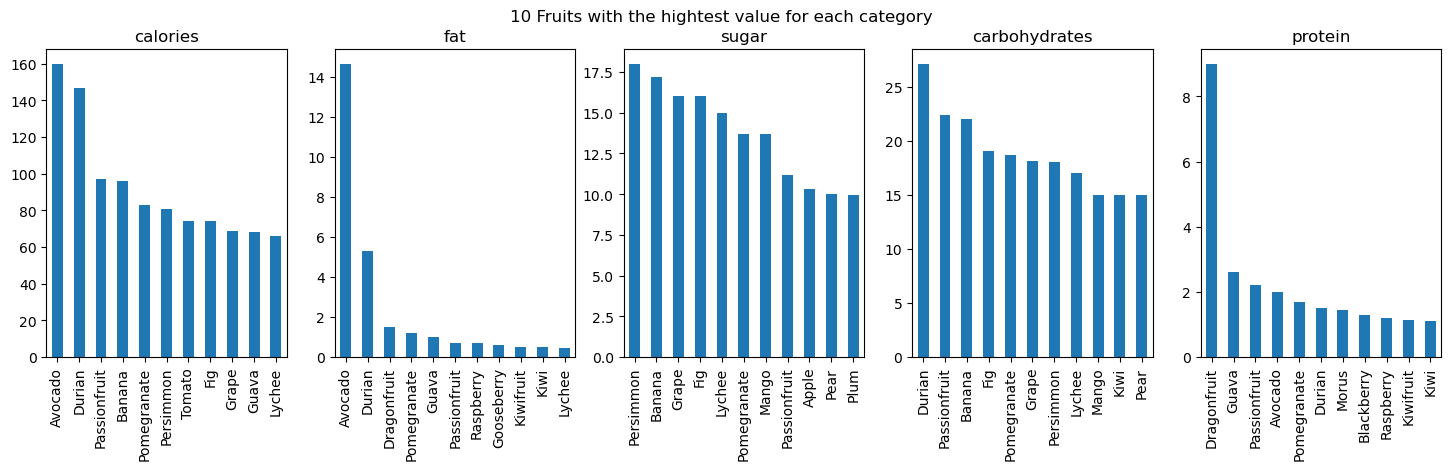

In [3]:
fig, ax = plt.subplots(1, 5, figsize=(18, 4))

nutritions_categories = fruit_df.columns[4:10]
fig.suptitle(f"10 Fruits with the hightest value for each category")
for i, nutrition_category in enumerate(nutritions_categories):
    sub_df = fruit_df.sort_values(by=nutrition_category, ascending=False).iloc[0:11, :]
    sub_df[nutrition_category].plot.bar(ax=ax[i])
    ax[i].set_xticklabels(sub_df["name"].tolist())
    ax[i].set_title(f"{nutrition_category.split('.')[1]}")
    
plt.show()

## R/. They can be seen in the plots above.

# Analysis
## In the categories fat and protein, avocado and dragonfruit have respectively very high values with respect to the next fruit. This could throw off the calculation of the centroids in KMeans and could be determined as outliers by DBSCAN.

# With the informantion above in mind, is there any transformation of the features needed before modeling?

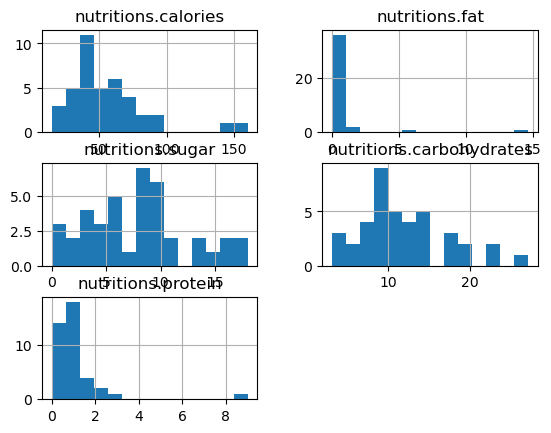

In [4]:
# Let's plot feature's distributions
fruit_df.hist(bins=14)
plt.show()

## R/. Yes, remove Dragonfruit, Durian and Avocado

In [5]:
fruits_to_remove = ["Avocado", "Durian", "Dragonfruit"]
index_fruits_to_remove = fruit_df[fruit_df["name"].isin(fruits_to_remove)].index

fruit_df.drop(index_fruits_to_remove, inplace=True)
fruit_df.reset_index(inplace=True, drop=True) # The values eliminated create discontinuities in the index
fruit_df.head()

,name,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,Ebenaceae,Rosales,Diospyros,81,0.0,18.0,18.0,0.0
1,Strawberry,Rosaceae,Rosales,Fragaria,29,0.4,5.4,5.5,0.8
2,Banana,Musaceae,Zingiberales,Musa,96,0.2,17.2,22.0,1.0
3,Tomato,Solanaceae,Solanales,Solanum,74,0.2,2.6,3.9,0.9
4,Pear,Rosaceae,Rosales,Pyrus,57,0.1,10.0,15.0,0.4


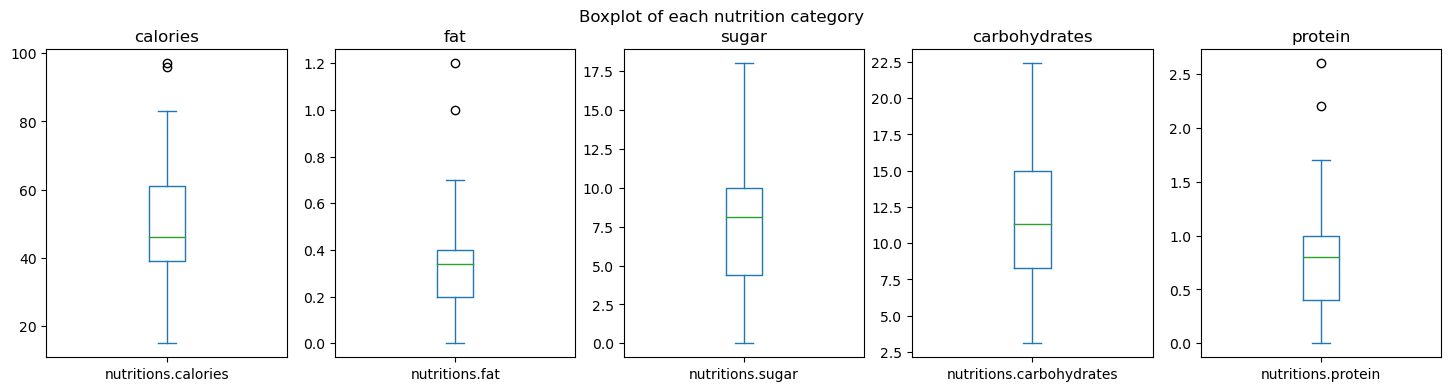

In [6]:
# Let's see if we have many outliers left
fig, ax = plt.subplots(1, 5, figsize=(18, 4))

nutritions_categories = fruit_df.columns[4:10]
fig.suptitle(f"Boxplot of each nutrition category")
for i, nutrition_category in enumerate(nutritions_categories):
    fruit_df[nutrition_category].plot.box(ax=ax[i])
    ax[i].set_title(f"{nutrition_category.split('.')[1]}")

plt.show()

# Analysis
## There are a few outliers left two in each category, but I won't remove them bc we would be left with 87.5% of the original dataset.

# Let's model, I'll be starting with KMeans


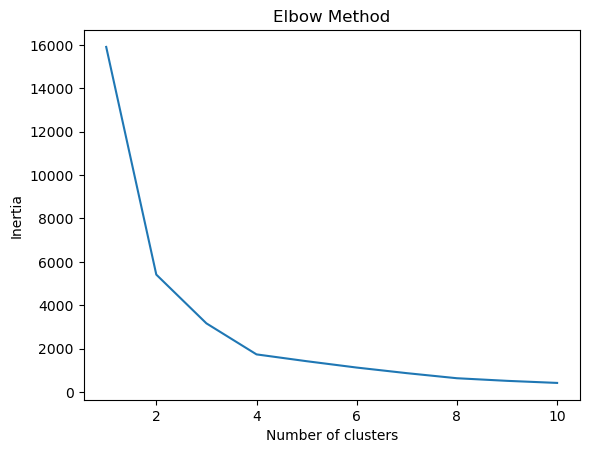

In [7]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter= 300, n_init=10)
    kmeans.fit(fruit_df[fruit_df.columns[4:10]])
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,11), inertia)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

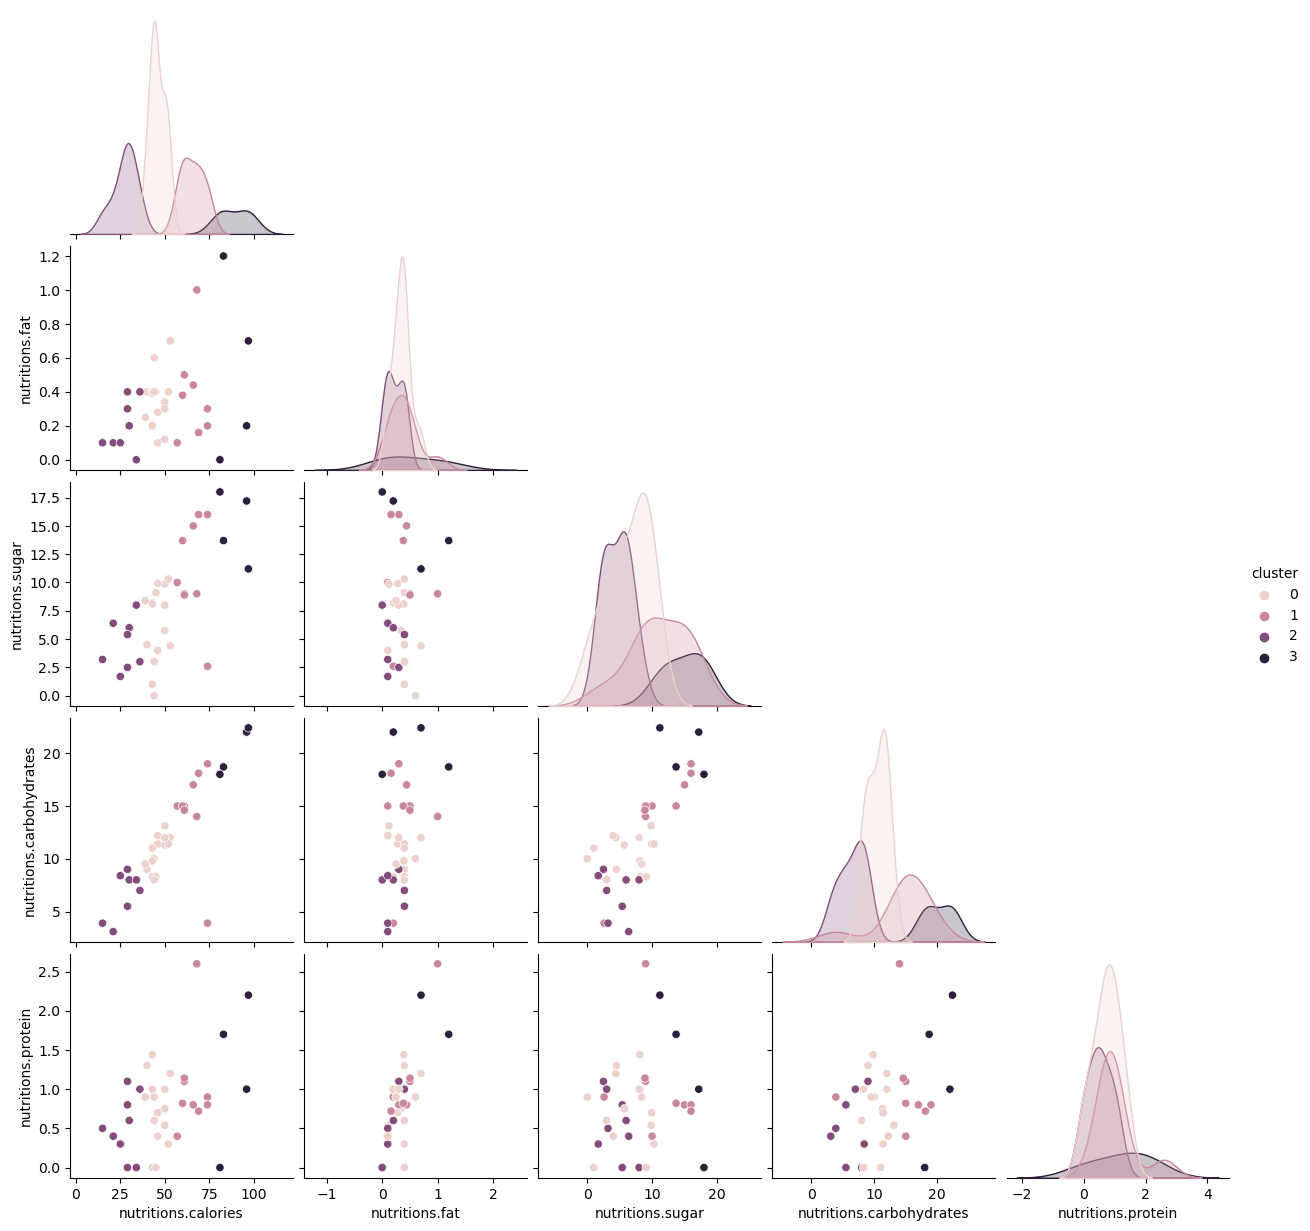

In [8]:
# Let's train a model with 4 clusters and see each variable against each other with hue as indicator of cluster
kmeans = KMeans(n_clusters=4, max_iter= 300, n_init=10)
kmeans.fit(fruit_df[fruit_df.columns[4:10]])
fruit_df["cluster"] = kmeans.labels_

sns.pairplot(fruit_df[fruit_df.columns[4:10]], hue="cluster", corner=True) # Not exploring the effect of variables over price just yet

plt.show()

# Analysis
## With the created clusters the relation between each variable comes to light, for example: fruits with high content of carbohydrates tend to have high calories and high sugar and viceversa. Who would've thought, right? haha. Other than pointing out the obvious, this clustering exercise allows to get hands on experience with the "labeling when no labels are given" including preparing the data and selecting the correct number of clusters.

# Now let's cluster with DBSCAN

In [9]:
dbscan = DBSCAN(eps=5, min_samples=2) # Hyper parameters: eps=5, min_samples=5
dbscan.fit(fruit_df[fruit_df.columns[4:10]])
fruit_df["cluster"] = dbscan.labels_

print(np.unique(fruit_df["cluster"]))

[-1  0  1  2  3]


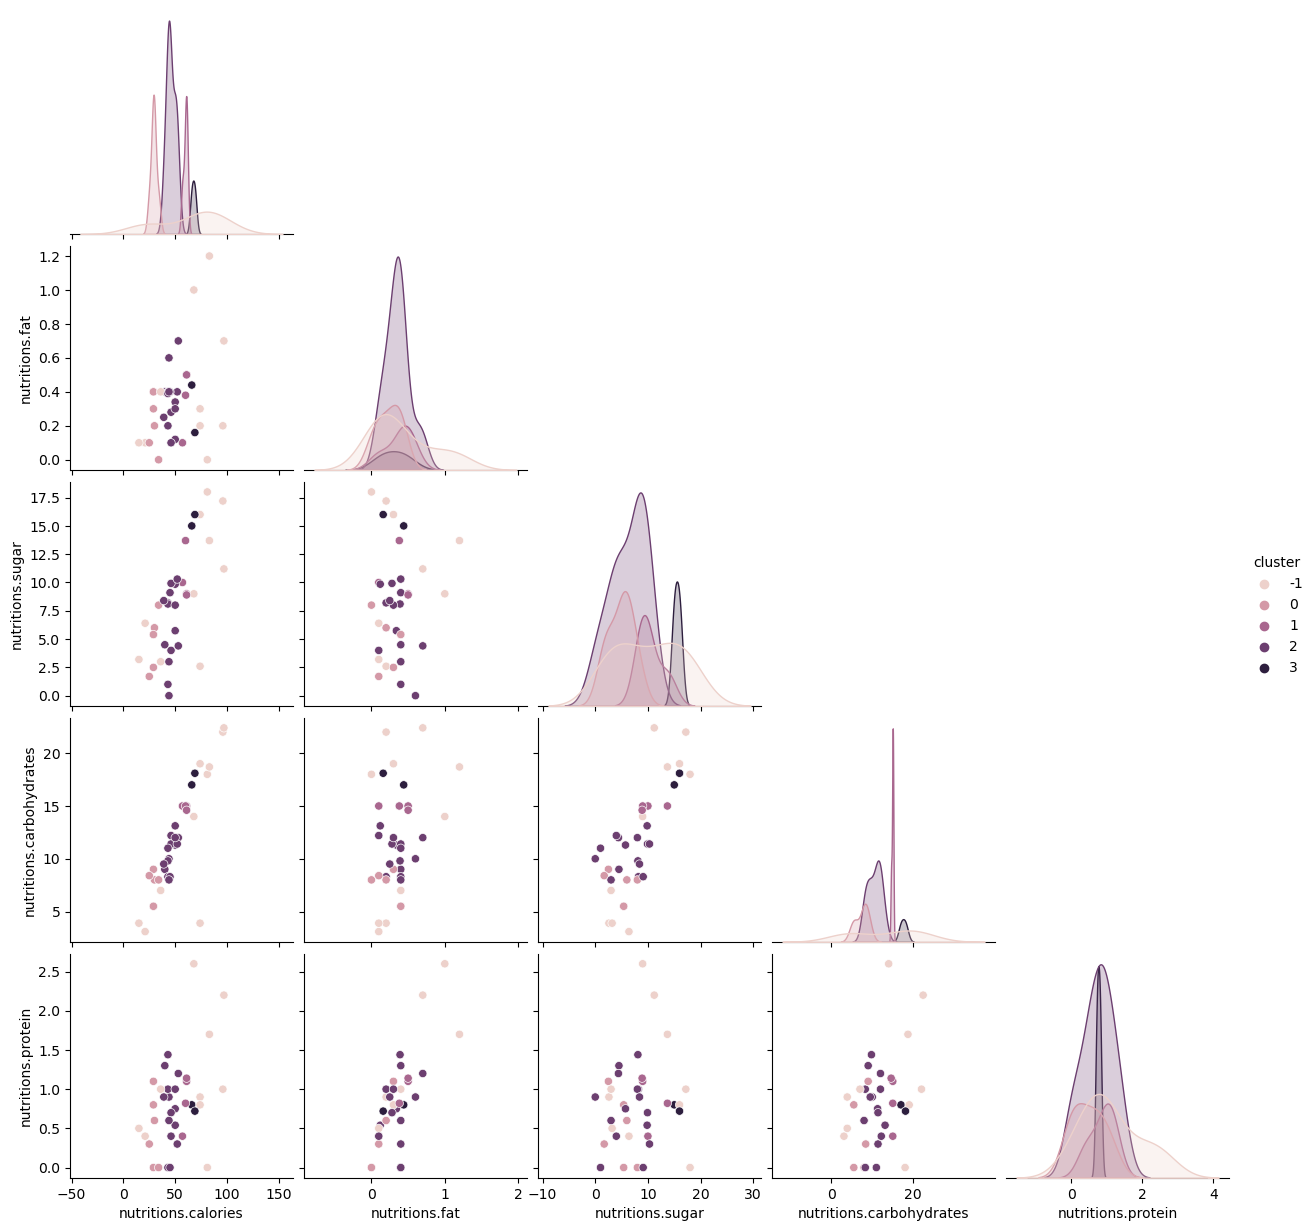

In [10]:
sns.pairplot(fruit_df[fruit_df.columns[4:10]], hue="cluster", corner=True) # Not exploring the effect of variables over price just yet

plt.show()

# Analysis
## After iterating with the two most important parameters of the model, the best result is the one that can be seen in the plot above. In it we see that the clustering that was done doesn't cluster the data into interpretable groups. Also the "unlabeled" cluster, in this case -1, is taking data from all ranges in all variables, this is because in those regions the density of the points is not enough to be included into another cluster. This leaves us with the unwanted result that can be seen in the -1 class distribution for all features, in which there is clearly no interpretation value for that group other than the one I just gave.